Context
Weather analysis and forecast is very crucial Navy industry, Aeronautical, Space, Agriculture and so on. Navy, Aeronautical, Spaceship are dependent on rain and heavy rainfall caused flood frequently leading to very complex phenomenon which is dependent on various atmospheric, oceanic and geographical parameters. The relationship between these parameters and rainfall is unstable. Climate related data is important to analyze agricultural and crop seeding related field, where those data can be used to show the predict the rainfall in different season also for different types of crops. 

Weather Details are collected for the contry India
Also data collected for Bengaluru
Also data was collected for city London.
This data is used for analysis.

In [113]:
# Importing statsmodels which is useful for statistics
import statsmodels.api as sm 

In [114]:
# Importing Scientific features from scipy.stats
import scipy.stats as stats
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt # Importing matplot library which is used in graph

In [115]:
# Importing pyspark so that py spark session can be created and used
import pyspark
from pyspark.sql import SparkSession # Pyspark sql is imported to get sql features
%matplotlib inline
# session is created so that data frames can be created
session = SparkSession.builder.appName('DataFrame Demo').getOrCreate()

In [116]:
from pyspark.sql import Row
# Importing from files into data frames respectively
#Data frame creation for India weather
df_weather_india = session.read.options(header=True, delimiter=',').csv('./weatherdata.csv')
# Data frame creation for Londan weather
df_weather_London = session.read.options(header=True, delimiter=',').csv('./history_bulk_London.csv')

For India Weather the dataframe is created below 
Accordingly Metrics are calculated
Here Metrics include MIN Temperature, Max Temperature,
MIN Precipitation and so on

In [117]:
df_weather_india.createOrReplaceTempView("data1")
session.table("data1")
session.table("data1").count

<bound method DataFrame.count of DataFrame[Name0: string, WindDirection: string, Period: string, Temperature: string, MaximumTemperature: string, Visibility: string, Latitude: string, WindSpeed: string, HeatIndex: string, CloudCover: string, MinimumTemperature: string, Datetime: string, Precipitation: string, SnowDepth: string, SeaLevelPressure: string, DewPoint: string, Name16: string, RelativeHumidity: string, ID: string, PrecipitationCover: string, WindGust: string, WindChill: string, Longitude: string]>

In [118]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
#sc = SparkContext()
#spark = SparkSession(sc)
#sqlContext = SQLContext(sc)
metrics = session.sql("Select MAX(Temperature) AS MAX_TEMP from data1")
metrics.show()

+--------+
|MAX_TEMP|
+--------+
|    33.6|
+--------+



In [119]:
metrics = session.sql("Select MAX(PrecipitationCover) as MAX_PRECIPITATE from data1")
metrics.show()

+---------------+
|MAX_PRECIPITATE|
+---------------+
|           4.95|
+---------------+



In [120]:
metrics = session.sql("Select MIN(PrecipitationCover) as MIN_PRECIPITATECOVER,Period from data1 group by Period")
metrics.show()

metrics = session.sql("Select MAX(SeaLevelPressure) as MAX_SeaLevelPressure from data1")
metrics.show()

+--------------------+------+
|MIN_PRECIPITATECOVER|Period|
+--------------------+------+
|                0.39|   Oct|
|                2.99|   Sep|
|                0.28|   Dec|
|                 4.4|   Aug|
|                2.15|   May|
|                2.86|   Jun|
|                1.42|   Feb|
|                0.37|   Nov|
|                1.19|   Mar|
|                1.41|   Jan|
|                 1.2|   Apr|
|                4.95|   Jul|
+--------------------+------+

+--------------------+
|MAX_SeaLevelPressure|
+--------------------+
|               997.9|
+--------------------+



In [121]:
metrics = session.sql("Select MAX(WindSpeed) as MAX_WIND_SPEED from data1")
metrics.show()
metrics = session.sql("Select MIN(WindSpeed) as MIN_WIND_SPEED from data1")
metrics.show()

+--------------+
|MAX_WIND_SPEED|
+--------------+
|          85.3|
+--------------+

+--------------+
|MIN_WIND_SPEED|
+--------------+
|          35.3|
+--------------+



In [122]:
metrics = session.sql("Select MIN(Temperature) AS MIN_TEMP from data1")
metrics.show()

+--------+
|MIN_TEMP|
+--------+
|    13.6|
+--------+



Type casting few columns

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
xpos=session.sql("select CAST(Temperature as Float) as Temperature from data1")
xpos.show()
ypos=session.sql("select CAST(Period as String) as Period from data1")
ypos.show()


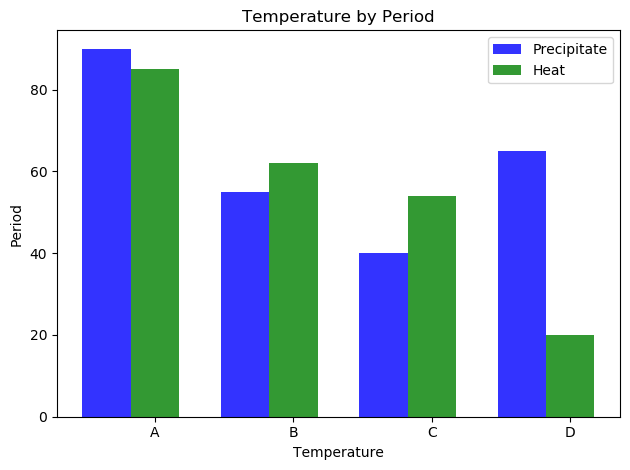

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
means_frank = session.sql("select CAST(Temperature as int) from data1")
means_guido = session.sql("select CAST(Precipitation as int) from data1")

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Precipitate')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Heat')

plt.xlabel('Temperature')
plt.ylabel('Period')
plt.title('Temperature by Period')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [125]:
# Display Dataframe data for London place
df_weather_London.head()
df=df_weather_London
# Display for limit of 3 rows
df.limit(3).show()

+----------+--------------------+--------+---------+---------+---------+------+----------+--------+--------+--------+---------+----------+--------+----------+--------+-------+-------+-------+-------+----------+----------+------------+-------------------+------------+
|        dt|              dt_iso|timezone|city_name| latitude|longitude|  temp|feels_like|temp_min|temp_max|pressure|sea_level|grnd_level|humidity|wind_speed|wind_deg|rain_1h|rain_3h|snow_1h|snow_3h|clouds_all|weather_id|weather_main|weather_description|weather_icon|
+----------+--------------------+--------+---------+---------+---------+------+----------+--------+--------+--------+---------+----------+--------+----------+--------+-------+-------+-------+-------+----------+----------+------------+-------------------+------------+
|1593561600|2020-07-01 00:00:...|    3600|   London|51.507351|-0.127758|289.89|    287.15| 288.468|  291.15|    1004|     null|      null|      77|       5.1|     230|   null|   null|   null|   nu

In [126]:
# Meta data for the columns in data frame for London place
df_weather_London.describe()

DataFrame[summary: string, dt: string, dt_iso: string, timezone: string, city_name: string, latitude: string, longitude: string, temp: string, feels_like: string, temp_min: string, temp_max: string, pressure: string, sea_level: string, grnd_level: string, humidity: string, wind_speed: string, wind_deg: string, rain_1h: string, rain_3h: string, snow_1h: string, snow_3h: string, clouds_all: string, weather_id: string, weather_main: string, weather_description: string, weather_icon: string]

In [127]:
# Meta data for the columns in data frame for India
df_weather_india

DataFrame[Name0: string, WindDirection: string, Period: string, Temperature: string, MaximumTemperature: string, Visibility: string, Latitude: string, WindSpeed: string, HeatIndex: string, CloudCover: string, MinimumTemperature: string, Datetime: string, Precipitation: string, SnowDepth: string, SeaLevelPressure: string, DewPoint: string, Name16: string, RelativeHumidity: string, ID: string, PrecipitationCover: string, WindGust: string, WindChill: string, Longitude: string]

In [128]:
# Meta data for the columns in data frame for Bengaluru
df_weather_bengaluru

DataFrame[Name0: string, Wind Direction: string, Period: string, Temperature: string, MaximumTemperature: string, Visibility: string, Latitude: string, WindSpeed: string, HeatIndex: string, CloudCover: string, MinimumTemperature: string, Datetime: string, Precipitation: string, SnowDepth: string, SeaLeve Pressure: string, DewPoint: string, Name16: string, RelativeHumidity: string, ID: string, PrecipitationCover: string, WindGust: string, WindChill: string, Longitude: string]

In [129]:
# View data for data frame for Bengaluru
df_weather_bengaluru.show()

+---------+--------------+------+-----------+------------------+----------+--------+---------+---------+----------+------------------+---------+-------------+---------+----------------+--------+---------+----------------+----+------------------+--------+---------+---------+
|    Name0|Wind Direction|Period|Temperature|MaximumTemperature|Visibility|Latitude|WindSpeed|HeatIndex|CloudCover|MinimumTemperature| Datetime|Precipitation|SnowDepth|SeaLeve Pressure|DewPoint|   Name16|RelativeHumidity|  ID|PrecipitationCover|WindGust|WindChill|Longitude|
+---------+--------------+------+-----------+------------------+----------+--------+---------+---------+----------+------------------+---------+-------------+---------+----------------+--------+---------+----------------+----+------------------+--------+---------+---------+
|bengaluru|         99.62|   Jan|       21.4|              31.1|       6.7| 12.9664|     33.5|     29.7|        31|               7.1| 1/1/1900|         12.2|     null|       

In [132]:
# Applying filter for Only January month weather for Bengaluru
df11 =df_weather_bengaluru.filter(df_weather_bengaluru.Period == 'Jan').show()


+---------+--------------+------+-----------+------------------+----------+--------+---------+---------+----------+------------------+--------+-------------+---------+----------------+--------+---------+----------------+----+------------------+--------+---------+---------+
|    Name0|Wind Direction|Period|Temperature|MaximumTemperature|Visibility|Latitude|WindSpeed|HeatIndex|CloudCover|MinimumTemperature|Datetime|Precipitation|SnowDepth|SeaLeve Pressure|DewPoint|   Name16|RelativeHumidity|  ID|PrecipitationCover|WindGust|WindChill|Longitude|
+---------+--------------+------+-----------+------------------+----------+--------+---------+---------+----------+------------------+--------+-------------+---------+----------------+--------+---------+----------------+----+------------------+--------+---------+---------+
|bengaluru|         99.62|   Jan|       21.4|              31.1|       6.7| 12.9664|     33.5|     29.7|        31|               7.1|1/1/1900|         12.2|     null|           

For LOcation = Bengaluru, 2 months data of weather have beeb considered
Their metrics are calculated.
As metrics here are MIN,MIX, AVG and so on

In [133]:
# Datafreame creation for Bengaluru weather
df_weather_bengaluru = session.read.options(header=True, delimiter=',').csv('./weatherdata_bengaluru.csv')

In [138]:
df_weather_bengaluru.createOrReplaceTempView("data1")
session.table("data1")

DataFrame[Name0: string, Wind Direction: string, Period: string, Temperature: string, MaximumTemperature: string, Visibility: string, Latitude: string, WindSpeed: string, HeatIndex: string, CloudCover: string, MinimumTemperature: string, Datetime: string, Precipitation: string, SnowDepth: string, SeaLeve Pressure: string, DewPoint: string, Name16: string, RelativeHumidity: string, ID: string, PrecipitationCover: string, WindGust: string, WindChill: string, Longitude: string]

In [139]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
#sc = SparkContext()
#spark = SparkSession(sc)
#sqlContext = SQLContext(sc)
metrics = session.sql("Select MAX(Temperature) AS MAX_TEMP from data1")
metrics.show()

+--------+
|MAX_TEMP|
+--------+
|    27.2|
+--------+



In [142]:
metrics = session.sql("Select MAX(PrecipitationCover) as MAX_PRECIPITATE from data1")
metrics.show()


metrics = session.sql("Select MIN(PrecipitationCover) as MIN_PRECIPITATECOVER,Period from data1 group by Period")
metrics.show()

metrics = session.sql("Select MAX(CloudCover) as MAX_SeaLevelPressure from data1")
metrics.show()

metrics = session.sql("Select MAX(WindSpeed) as MAX_WIND_SPEED from data1")
metrics.show()
metrics = session.sql("Select MIN(WindSpeed) as MIN_WIND_SPEED from data1")
metrics.show()

metrics = session.sql("Select MIN(Temperature) AS MIN_TEMP from data1")
metrics.show()


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
xpos=session.sql("select CAST(Temperature as Float) as Temperature from data1")
xpos.show()
ypos=session.sql("select CAST(Period as String) as Period from data1")
ypos.show()

+---------------+
|MAX_PRECIPITATE|
+---------------+
|           9.61|
+---------------+

+--------------------+------+
|MIN_PRECIPITATECOVER|Period|
+--------------------+------+
|                7.37|   Oct|
|                8.43|   Sep|
|                1.91|   Dec|
|                9.38|   Aug|
|                6.47|   May|
|                6.94|   Jun|
|                1.28|   Feb|
|                3.84|   Nov|
|                1.46|   Mar|
|                0.36|   Jan|
|                 4.5|   Apr|
|                9.61|   Jul|
+--------------------+------+

+--------------------+
|MAX_SeaLevelPressure|
+--------------------+
|                81.5|
+--------------------+

+--------------+
|MAX_WIND_SPEED|
+--------------+
|          59.4|
+--------------+

+--------------+
|MIN_WIND_SPEED|
+--------------+
|          29.5|
+--------------+

+--------+
|MIN_TEMP|
+--------+
|    20.8|
+--------+

+-----------+
|Temperature|
+-----------+
|       21.4|
|       23.5|
|       25.8|


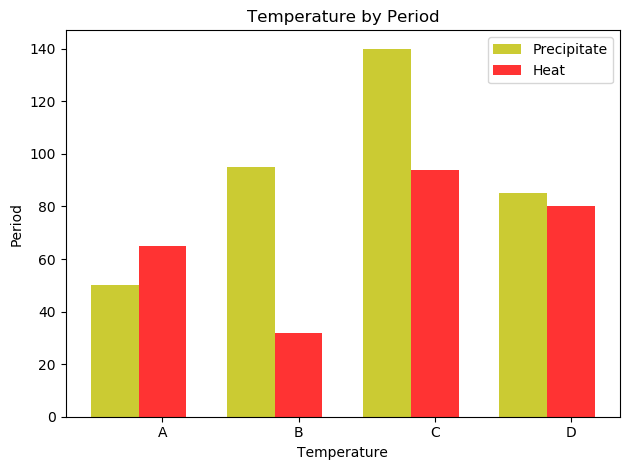

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
means_frank = session.sql("select CAST(Temperature as int) from data1")
means_guido = session.sql("select CAST(Precipitation as int) from data1")

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
means_frank = (50, 95, 140, 85)
means_guido = (65, 32, 94, 80)
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='y',
label='Precipitate')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Heat')

plt.xlabel('Temperature')
plt.ylabel('Period')
plt.title('Temperature by Period')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()